# Global Solutions 2024

Giovanna Shiguemori Barbosa - 99105

Isabela Victória de Novais Romanato - 550234


## Overview

This notebook will show you how to create and query a table or DataFrame that you uploaded to DBFS. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

## 1. Validação dos Dados 

Importação das bibliotecas

In [0]:
!pip install azure-storage-blob pandas

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-1533e78b-20c1-430a-9e4c-24f16bdd5173/bin/python -m pip install --upgrade pip' command.


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark.pandas as ps

Carregar dataset

In [0]:
from azure.storage.blob import BlobServiceClient
import pandas as pd
import io  # Import necessário para StringIO

# Configurações da Azure
connection_string = "DefaultEndpointsProtocol=https;AccountName=isabelagiovanna;AccountKey=dYDCV4VHTyp/J+xVV7A5zUMAQGBmj2HdyRJv+yvU7tnRM3oYGRtR7A9paVMW4sd+Jve42U9/+nJR+AStx+doDg==;EndpointSuffix=core.windows.net"  
container_name = "origemdedados"       
blob_name = "climate_change_data.csv"           

# Conecte-se ao Blob Storage
blob_service_client = BlobServiceClient.from_connection_string(connection_string)
blob_client = blob_service_client.get_blob_client(container=container_name, blob=blob_name)

# Faça o download do arquivo como texto
download_stream = blob_client.download_blob()
csv_content = download_stream.readall().decode('utf-8')

# Use io.StringIO para interpretar o conteúdo como arquivo
csv_file_like = io.StringIO(csv_content)

# Carregue o conteúdo no pandas
df = pd.read_csv(csv_file_like)

# Exiba os dados
display(df)


Date Location Country Temperature CO2 Emissions Sea Level Rise Precipitation Humidity Wind Speed 2000-01-01 00:00:00.000000000 New Williamtown Latvia 10.688985961440224 403.118902532313 0.7175060280487084 13.835236935170093 23.631256224753127 18.492026001060687 2000-01-01 20:09:43.258325832 North Rachel South Africa 13.814430285994884 396.6634992886479 1.205714577973989 40.97408400927044 43.98294551257813 34.24929982477023 2000-01-02 16:19:26.516651665 West Williamland French Guiana 27.32371775936091 451.5531550541853 -0.1607829704317243 42.69793130058377 96.65259963507044 34.12426102508349 2000-01-03 12:29:09.774977497 South David Vietnam 12.309580591035468 422.4049834902143 -0.4759314713381429 5.19334125444082 47.467938218670255 8.554563363421174 2000-01-04 08:38:53.033303330 New Scottburgh Moldova 13.21088505803461 410.4729985512822 1.135756628043307 78.69527968277524 61.789671701534864 8.001163673482758 2000-01-05 04:48:36.291629162 South Nathan Saint Helena 6.229326002700251 392.47331719038647 1.1222096515478814 76.36833149286181 48.97388550678613 30.39890794329896 2000-01-06 00:58:19.549954995 Port Richardfurt Tuvalu 21.646738086726472 387.6484371180284 0.0584712409258889 9.650388925838593 11.402284470873091 15.720943642696325 2000-01-06 21:08:02.808280828 Adambury Australia 19.73080011919501 448.1802750047965 0.0014150785882038 93.36075533008152 21.526349705088965 29.99349506057048 2000-01-07 17:17:46.066606660 Williamsonberg Qatar 19.85811441229347 379.61882007364414 0.5848806209007508 6.21884631797559 30.861948899872115 37.51947246463215 2000-01-08 13:27:29.324932493 North Thomas Chad 14.121562914551053 410.5170723682955 -1.7122242470452451 15.351582928470986 88.4227939532216 47.92252054153893 2000-01-09 09:37:12.583258325 West Jillton Fiji 6.095003072400665 360.81117844919766 -0.9350594522492722 95.46176935634224 28.932543882937036 20.88834143678071 2000-01-10 05:46:55.841584158 Robertville Guernsey 12.28706409332796 488.3559377027121 0.0213680521961255 11.838236022909554 90.04033901797068 30.43540963729574 2000-01-11 01:56:39.099909991 Camposfort Egypt 22.324532669935788 445.20896015646974 -1.0288023041541257 48.77875857440538 83.4062518121287 1.833402038880011 2000-01-11 22:06:22.358235823 Hughesville Rwanda 15.788180996646265 373.3412975290676 -2.0615358826600483 13.36168293068376 56.94488536727391 23.386007990776783 2000-01-12 18:16:05.616561656 Adammouth Samoa 17.060977860429766 503.450872519532 1.281869804834719 80.91894667671423 24.79688971691132 17.094476927615037 2000-01-13 14:25:48.874887488 East Ricardomouth Mongolia 7.164086322706169 447.62319628782245 -0.0846604808732542 89.80802188936613 96.88787047585592 32.02683683766415 2000-01-14 10:35:32.133213321 Port Robertborough Equatorial Guinea 14.799343929906742 396.9978084368574 -1.0867896679413167 23.28876445516711 37.69558959188566 41.68841461602788 2000-01-15 06:45:15.391539153 South Natalieshire Libyan Arab Jamahiriya 2.228858554949776 348.1042715672331 -0.0306183480327122 64.63697079124101 21.77200392186832 46.22845710599407 2000-01-16 02:54:58.649864986 Zacharyborough Libyan Arab Jamahiriya 16.901893288020684 359.17175493562024 -0.1350399006404893 15.512609183989568 84.10307772093363 25.939785941291127 2000-01-16 23:04:41.908190819 Bakerburgh Mali 10.874589265810686 415.6086325655381 1.2183139750539658 57.99068057397449 15.764406719831404 10.098796629230185 2000-01-17 19:14:25.166516651 Devinchester Cocos (Keeling) Islands 13.818428480255111 343.25327264121586 0.5417702302824254 14.361387877127996 8.28530787984587 13.802637166275378 2000-01-18 15:24:08.424842484 Thompsonburgh Bahrain 10.02693179782263 325.31158834806394 0.6559375173958361 49.14687341201124 47.72895684865398 27.800184818719 2000-01-19 11:33:51.683168316 East Darlene French Southern Territories 21.08214940898184 421.30428947297537 0.2369629437972701 95.56628339351766 87.70152798025715 34.05023601934412 2000-01-20 07:43:34.941494149 North Ericchester Iceland 3.940120976025464 352.7607490

Resumo com informações das colunas

In [0]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.2+ KB


Verifica presença de nulos 

In [0]:
df.isnull().sum()

Out[122]: Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64

Verifica se há linhas duplicadas

In [0]:
df.duplicated().values.any()

Out[123]: False

Resumo conciso das estatísticas descritivas

In [0]:
df.describe()

Temperature 
 CO2 Emissions 
 Sea Level Rise 
 Precipitation 
 Humidity 
 Wind Speed 
 
 
 
 
 count 
 10000.000000 
 10000.000000 
 10000.000000 
 10000.000000 
 10000.000000 
 10000.000000 
 
 
 mean 
 14.936034 
 400.220469 
 -0.003152 
 49.881208 
 49.771302 
 25.082066 
 
 
 std 
 5.030616 
 49.696933 
 0.991349 
 28.862417 
 28.929320 
 14.466648 
 
 
 min 
 -3.803589 
 182.131220 
 -4.092155 
 0.010143 
 0.018998 
 0.001732 
 
 
 25% 
 11.577991 
 367.109330 
 -0.673809 
 24.497516 
 24.713250 
 12.539733 
 
 
 50% 
 14.981136 
 400.821324 
 0.002332 
 49.818967 
 49.678412 
 24.910787 
 
 
 75% 
 18.305826 
 433.307905 
 0.675723 
 74.524991 
 75.206390 
 37.670260 
 
 
 max 
 33.976956 
 582.899701 
 4.116559 
 99.991900 
 99.959665 
 49.997664

## 2. Análise Exploratória de Dados

Gerar cópia do dataset original e criar um "limpo"

In [0]:
clean_df = df.copy()

Verificando colunas

In [0]:
clean_df.columns

Out[126]: Index(['Date', 'Location', 'Country', 'Temperature', 'CO2 Emissions',
       'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed'],
      dtype='object')

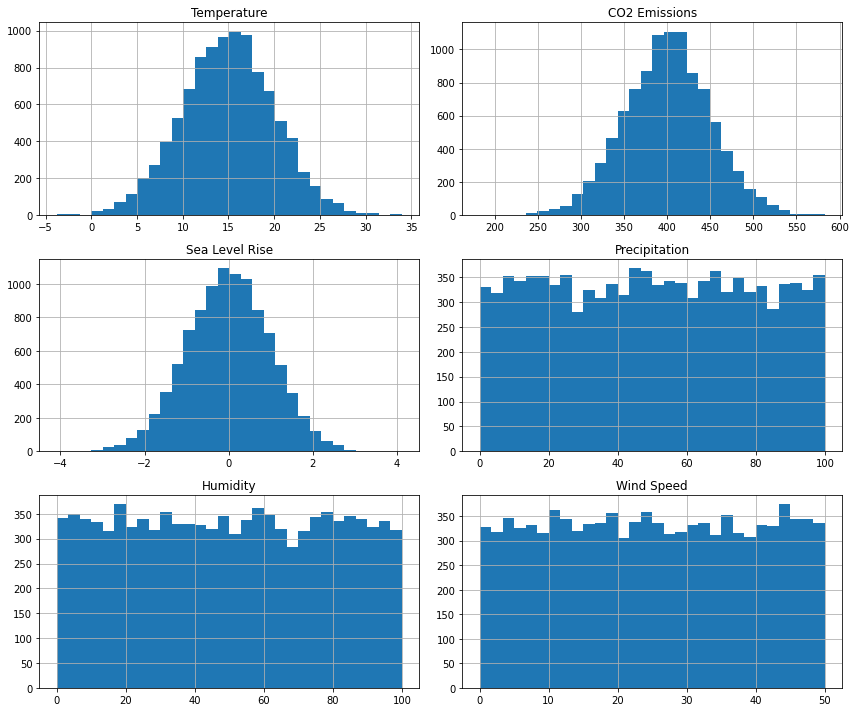

In [0]:
clean_df[['Temperature', 'CO2 Emissions','Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']].hist(figsize=(12, 10), bins=30)
plt.tight_layout()

Observações em relação aos histogramas: 

1. Temperatura: O histograma de temperatura mostra uma distribuição aproximadamente normal, sugerindo que as leituras de temperatura são estáveis ​​e previsíveis.

2. Emissões de CO2: O histograma de emissões de CO2 também é aproximadamente normal, com valores concentrados em torno de 400 ppm, sendo estáveis ao longo do tempo.  

3. Aumento do nível do mar: O histograma de aumento do nível do mar também é aproximadamente normal.

4. Precipitação: O histograma de precipitação mostra uma distribuição mais uniforme, indicando variabiliade nos padrões.

5. Umidade: O histograma de umidade também mostra uma distribuição relativamente uniforme na faixa de 0% a 100%.

6. Velocidade do vento: O histograma da velocidade do vento apresenta uma distribuição uniforme, com valores variando de 0 a 50 km/h.

Analisando colunas com valores discrepantes

Out[128]: Text(0.5, 1.0, 'Box Plots of Features')

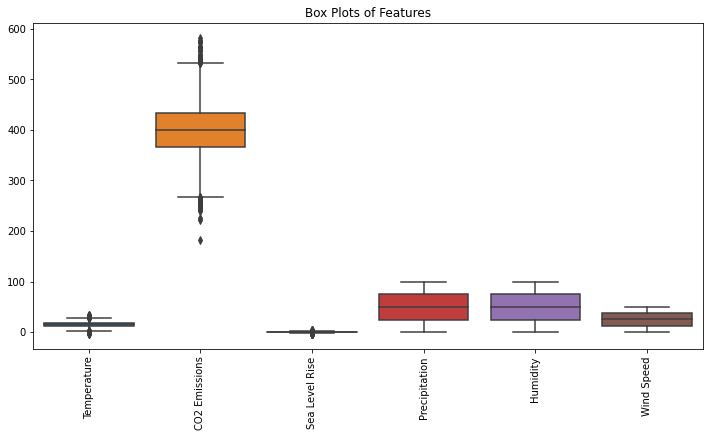

In [0]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=clean_df)
plt.xticks(rotation=90)
plt.title('Box Plots of Features')

Verificando presença de outliers

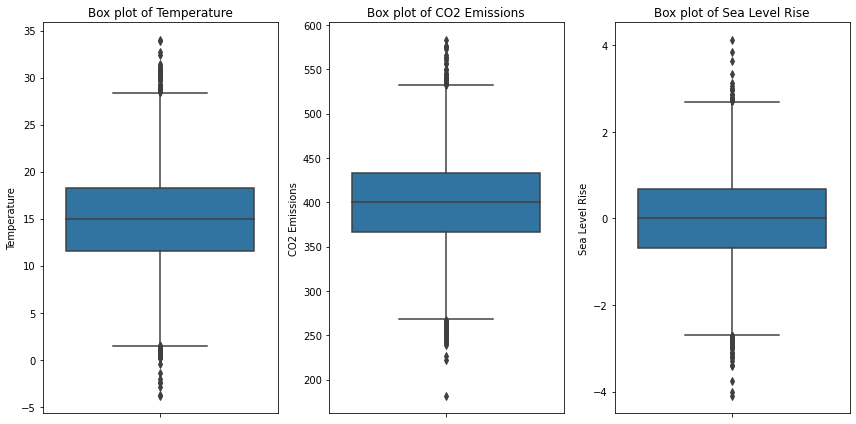

In [0]:
features = ['Temperature','CO2 Emissions','Sea Level Rise']

fig, axs = plt.subplots(1,3,figsize = (12,6))

for ax,feature in zip(axs, features):
    sns.boxplot(y = feature,data=clean_df, ax = ax)
    ax.set_title(f'Box plot of {feature}')
    
plt.tight_layout()

Mapa de Calor

Out[130]: <seaborn.axisgrid.PairGrid at 0x7f2dabf3b940>

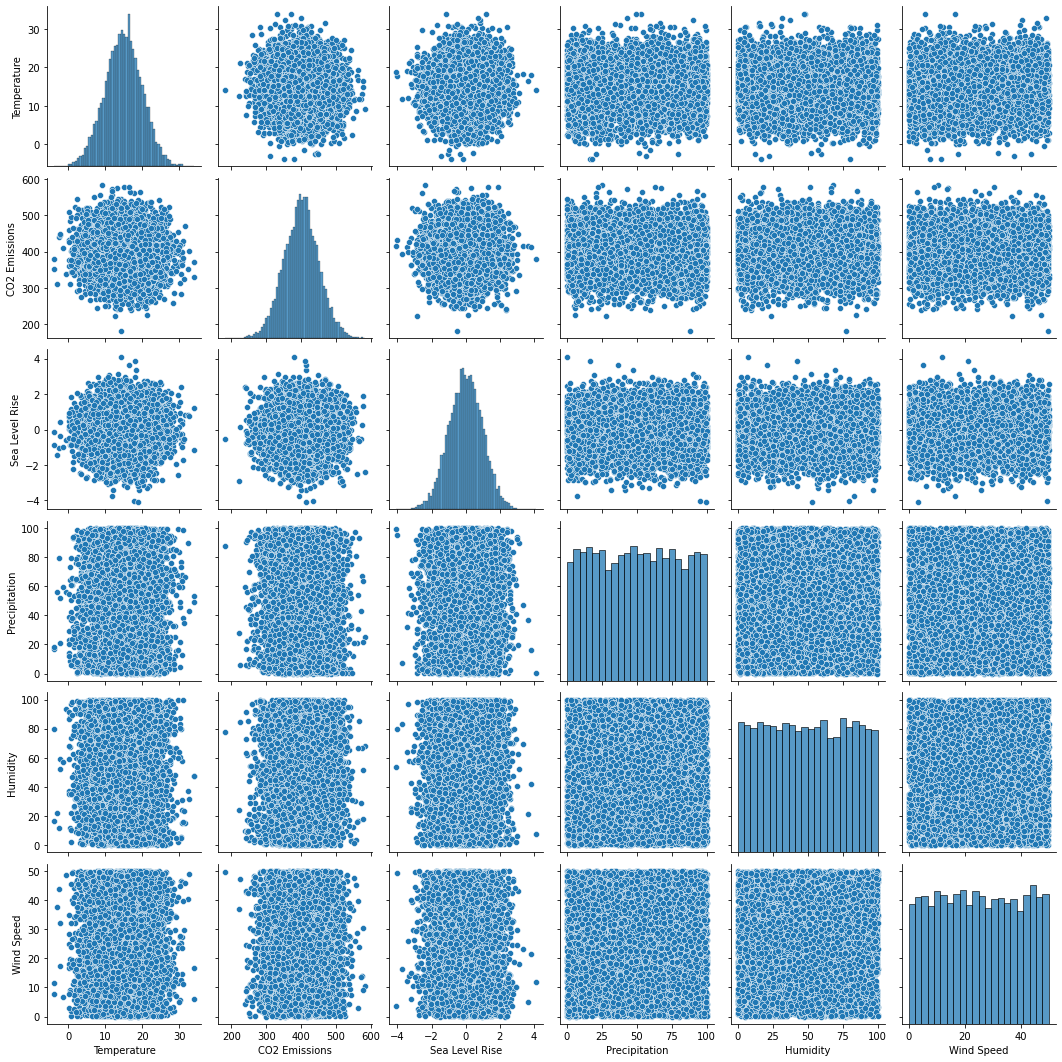

In [0]:
sns.pairplot(data = clean_df)

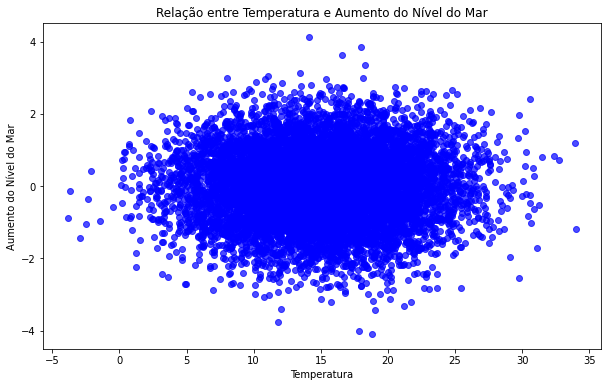

In [0]:
# Ajustando o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(df_relacionamento_pandas['Temperature'],
df_relacionamento_pandas['Sea Level Rise'], color='blue', alpha=0.7)

# Adicionando título e rótulos aos eixos
plt.title("Relação entre Temperatura e Aumento do Nível do Mar")
plt.xlabel("Temperatura")
plt.ylabel("Aumento do Nível do Mar")
plt.show()

Matriz de Correlação

In [0]:
num_features=clean_df[['Sea Level Rise', 'Temperature', 'CO2 Emissions', 'Precipitation', 'Humidity', 'Wind Speed']]

In [0]:
corr_matrix = num_features.corr()

Out[134]: <AxesSubplot:>

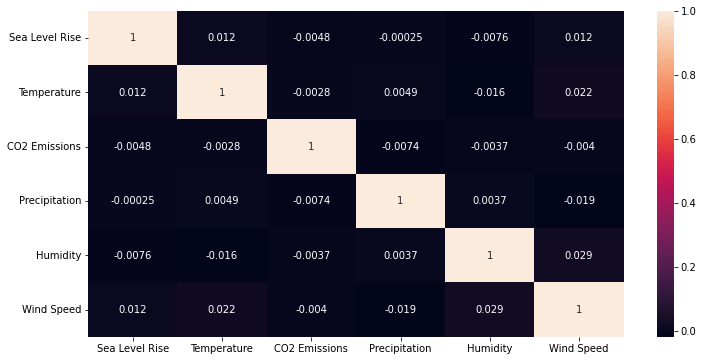

In [0]:
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot = True)

A correlação entre as variáveis é baixa. Essa evidência sugere uma relação linear quase inexistente entre a Sea Level Rise e as outras características.

Análise da Tendência

In [0]:
# plt.figure(figsize=(12, 6))
# plt.plot(clean_df['Date'], clean_df['Temperature'])
# plt.title('Temperature Over Time')
# plt.xlabel('Date')
# plt.ylabel('Temperature (°C)')

Não há tendencia ao longo dos anos.

## 3. Desenvolvimento dos Modelos 

Regressão Linear

In [0]:
clean_df.drop(['Date','Location','Country', 'Date'], axis = 1, inplace = True)

In [0]:
clean_df

Temperature 
 CO2 Emissions 
 Sea Level Rise 
 Precipitation 
 Humidity 
 Wind Speed 
 
 
 
 
 0 
 10.688986 
 403.118903 
 0.717506 
 13.835237 
 23.631256 
 18.492026 
 
 
 1 
 13.814430 
 396.663499 
 1.205715 
 40.974084 
 43.982946 
 34.249300 
 
 
 2 
 27.323718 
 451.553155 
 -0.160783 
 42.697931 
 96.652600 
 34.124261 
 
 
 3 
 12.309581 
 422.404983 
 -0.475931 
 5.193341 
 47.467938 
 8.554563 
 
 
 4 
 13.210885 
 410.472999 
 1.135757 
 78.695280 
 61.789672 
 8.001164 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 9995 
 15.020523 
 391.379537 
 -1.452243 
 93.417109 
 25.293814 
 6.531866 
 
 
 9996 
 16.772451 
 346.921190 
 0.543616 
 49.882947 
 96.787402 
 42.249014 
 
 
 9997 
 22.370025 
 466.042136 
 1.026704 
 30.659841 
 15.211825 
 18.293708 
 
 
 9998 
 19.430853 
 337.899776 
 -0.895329 
 18.932275 
 82.774520 
 42.424255 
 
 
 9999 
 12.661928 
 381.172746 
 2.260788 
 78.339658 
 99.243923 
 41.856539 
 
 
 
 10000 rows × 6 columns

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

X = clean_df.drop(['Sea Level Rise'], axis = 1)
y = clean_df['Sea Level Rise']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Erro quadrático médio:', mse)
print('Coeficiente de determinação:', r2)

Erro quadrático médio: 0.9973860307922685
Coeficiente de determinação: -0.0029546178809112256


Random Forest Regressor

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [0]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     10000 non-null  float64
 1   CO2 Emissions   10000 non-null  float64
 2   Sea Level Rise  10000 non-null  float64
 3   Precipitation   10000 non-null  float64
 4   Humidity        10000 non-null  float64
 5   Wind Speed      10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB


In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [0]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
predictions = rf_model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Score:', rf_model.score(X_test, y_test))

MAE: 0.8124131354713865
MSE: 1.0283395817132381
RMSE: 1.0140707971898402
Score: -0.037693797047672506


Interpretando os Resultados

Com base nos valores apresentados:

MAE = 0.8101: Em média, o modelo erra por cerca de 0.81 unidades na previsão.

MSE = 1.0259: O erro quadrático médio é de aproximadamente 1.02.

RMSE = 1.0129: A raiz quadrada do erro quadrático médio é de aproximadamente 1.01, o que significa que, em média, as previsões estão desviando cerca de 1.01 unidades dos valores reais.

Score = -0.0353: O valor negativo do score indica que o modelo não está conseguindo explicar a variabilidade dos dados.

PCA

In [0]:
clean_df

Temperature 
 CO2 Emissions 
 Sea Level Rise 
 Precipitation 
 Humidity 
 Wind Speed 
 
 
 
 
 0 
 10.688986 
 403.118903 
 0.717506 
 13.835237 
 23.631256 
 18.492026 
 
 
 1 
 13.814430 
 396.663499 
 1.205715 
 40.974084 
 43.982946 
 34.249300 
 
 
 2 
 27.323718 
 451.553155 
 -0.160783 
 42.697931 
 96.652600 
 34.124261 
 
 
 3 
 12.309581 
 422.404983 
 -0.475931 
 5.193341 
 47.467938 
 8.554563 
 
 
 4 
 13.210885 
 410.472999 
 1.135757 
 78.695280 
 61.789672 
 8.001164 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 9995 
 15.020523 
 391.379537 
 -1.452243 
 93.417109 
 25.293814 
 6.531866 
 
 
 9996 
 16.772451 
 346.921190 
 0.543616 
 49.882947 
 96.787402 
 42.249014 
 
 
 9997 
 22.370025 
 466.042136 
 1.026704 
 30.659841 
 15.211825 
 18.293708 
 
 
 9998 
 19.430853 
 337.899776 
 -0.895329 
 18.932275 
 82.774520 
 42.424255 
 
 
 9999 
 12.661928 
 381.172746 
 2.260788 
 78.339658 
 99.243923 
 41.856539 
 
 
 
 10000 rows × 6 columns

In [0]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
import seaborn as sns

In [0]:
components = 2
cols = ['Temperature',	'CO2 Emissions',	'Sea Level Rise',	'Precipitation',	'Humidity',	'Wind Speed']
scaled_df = clean_df[cols]
pca = PCA(n_components=components)
pca_components = pca.fit_transform(scaled_df)

columns = ['pca_comp_%i' % i for i in range(components)]
df_pca = pd.DataFrame(pca_components, columns=columns, index=clean_df.index)
df_pca.head()


pca_comp_0 
 pca_comp_1 
 
 
 
 
 0 
 -3.227739 
 -39.930871 
 
 
 1 
 3.491375 
 -9.179324 
 
 
 2 
 -51.211111 
 38.561890 
 
 
 3 
 -22.504535 
 -22.830991 
 
 
 4 
 -10.047279 
 23.896076

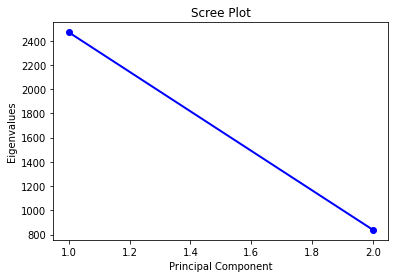

In [0]:
plt.plot(np.arange(pca.n_components_)+1, pca.explained_variance_,'o-',linewidth=2,color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalues')
plt.show()

In [0]:
# instanciar o pca
components = 2
pca = PCA(n_components=components)
pca_components = pca.fit_transform(scaled_df)

columns = ['pca_comp_%i' % i for i in range(components)]
componentes_cols = ['PC'+str(i) for i in range(1,components+1)]
df_pca  = pd.DataFrame(pca_components, columns=componentes_cols, index=clean_df.index)
df_pca.head()

PC1 
 PC2 
 
 
 
 
 0 
 -3.227739 
 -39.930871 
 
 
 1 
 3.491375 
 -9.179324 
 
 
 2 
 -51.211111 
 38.561890 
 
 
 3 
 -22.504535 
 -22.830991 
 
 
 4 
 -10.047279 
 23.896076

In [0]:
df2 = pd.concat([df_pca, clean_df['Sea Level Rise']], axis=1)
df2.head()

PC1 
 PC2 
 Sea Level Rise 
 
 
 
 
 0 
 -3.227739 
 -39.930871 
 0.717506 
 
 
 1 
 3.491375 
 -9.179324 
 1.205715 
 
 
 2 
 -51.211111 
 38.561890 
 -0.160783 
 
 
 3 
 -22.504535 
 -22.830991 
 -0.475931 
 
 
 4 
 -10.047279 
 23.896076 
 1.135757

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# validacao cruzada
from sklearn.model_selection import KFold, StratifiedKFold
# regressao penalizada
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

features = ['PC1','PC2']
target = ['Sea Level Rise']

x = df2[features]
y = df2[target]
x_columns = x.columns.to_list()
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)
print(model.score(x_test, y_test))
lr_coef = pd.DataFrame(np.append(model.intercept_, model.coef_), ['intercepto'] + x_columns, columns=['Lin Reg'])
lr_coef

-0.0007341678053305323


Lin Reg 
 
 
 
 
 intercepto 
 0.002333 
 
 
 PC1 
 0.000514 
 
 
 PC2 
 -0.007312

In [0]:
#define cross-validation method to evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=42)
model = LassoCV(alphas=np.arange(0.1, 1, 0.1), cv=cv)
model.fit(x_train,y_train.values.ravel())
print(model.alpha_)
print(model.score(x_test, y_test))
coef_lasso = pd.DataFrame(np.append(model.intercept_, model.coef_), ['intercepto'] + x_columns, columns=['Lasso'])
coef_lasso

0.9
-0.0007719297600194963


Lasso 
 
 
 
 
 intercepto 
 0.00229 
 
 
 PC1 
 0.00000 
 
 
 PC2 
 -0.00000

In [0]:
# Define a forma de validação cruzada que será usada na regressão Ridge
cv = KFold(n_splits=10, shuffle=True, random_state=42)
model = RidgeCV(alphas=np.arange(0.1, 1, 0.1), cv=cv, scoring='neg_mean_squared_error')
model.fit(x_train, y_train)
# Indica o melhor alpha para a Ridge
print(model.alpha_)
print(model.score(x_test, y_test))
coef_ridge = pd.DataFrame(np.append(model.intercept_, model.coef_), ['intercepto'] + x_columns, columns=['Ridge'])
# Indica os coeficientes calculados para a Ridge
coef_ridge

0.9
-0.0007341653492956013


Ridge 
 
 
 
 
 intercepto 
 0.002333 
 
 
 PC1 
 0.000514 
 
 
 PC2 
 -0.007311

In [0]:
coefs = pd.concat([lr_coef, coef_lasso, coef_ridge], axis=1)
coefs

Lin Reg 
 Lasso 
 Ridge 
 
 
 
 
 intercepto 
 0.002333 
 0.00229 
 0.002333 
 
 
 PC1 
 0.000514 
 0.00000 
 0.000514 
 
 
 PC2 
 -0.007312 
 -0.00000 
 -0.007311

Observando o modelo, o desempenho foi insatisfatório... 

MLP


In [0]:
clean_df

Temperature 
 CO2 Emissions 
 Sea Level Rise 
 Precipitation 
 Humidity 
 Wind Speed 
 
 
 
 
 0 
 10.688986 
 403.118903 
 0.717506 
 13.835237 
 23.631256 
 18.492026 
 
 
 1 
 13.814430 
 396.663499 
 1.205715 
 40.974084 
 43.982946 
 34.249300 
 
 
 2 
 27.323718 
 451.553155 
 -0.160783 
 42.697931 
 96.652600 
 34.124261 
 
 
 3 
 12.309581 
 422.404983 
 -0.475931 
 5.193341 
 47.467938 
 8.554563 
 
 
 4 
 13.210885 
 410.472999 
 1.135757 
 78.695280 
 61.789672 
 8.001164 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 9995 
 15.020523 
 391.379537 
 -1.452243 
 93.417109 
 25.293814 
 6.531866 
 
 
 9996 
 16.772451 
 346.921190 
 0.543616 
 49.882947 
 96.787402 
 42.249014 
 
 
 9997 
 22.370025 
 466.042136 
 1.026704 
 30.659841 
 15.211825 
 18.293708 
 
 
 9998 
 19.430853 
 337.899776 
 -0.895329 
 18.932275 
 82.774520 
 42.424255 
 
 
 9999 
 12.661928 
 381.172746 
 2.260788 
 78.339658 
 99.243923 
 41.856539 
 
 
 
 10000 rows × 6 columns

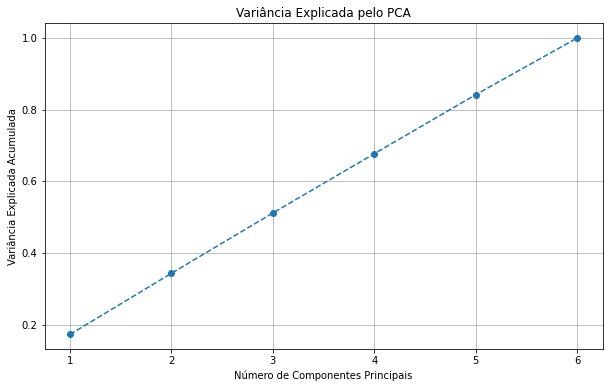

Accuracy: 0.7345
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74       997
           1       0.74      0.72      0.73      1003

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000



In [0]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pyspark.pandas as ps
 
# Carregando os dados
file_location = "/FileStore/tables/climate_change_data.csv"
df = ps.read_csv(file_location).to_pandas()
 
# Criando uma coluna de destino 'target' com base em uma condição (por exemplo, temperatura acima da média)
df['target'] = (df['Temperature'] > df['Temperature'].mean()).astype(int)
 
# Selecionando as variáveis numéricas para o PCA
features = ['Temperature', 'CO2 Emissions', 'Precipitation', 'Humidity', 'Wind Speed', 'Sea Level Rise']
df_features = df[features]
target = df['target']
 
# Padronizando os dados
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)
 
# Aplicando PCA
pca = PCA()
pca_components = pca.fit_transform(scaled_features)
 
# Percentual de variância explicada por cada componente
explained_variance = pca.explained_variance_ratio_
 
# Plotando a variância explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada pelo PCA')
plt.grid()
plt.show()
 
# Usando apenas os primeiros componentes principais que explicam a maioria da variância
n_components = 3  # Ajuste conforme necessário com base na variância explicada
pca = PCA(n_components=n_components)
pca_components = pca.fit_transform(scaled_features)
 
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(pca_components, target, test_size=0.2, random_state=42)
 
# Criando e treinando o modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
 
# Fazendo previsões
y_pred = mlp.predict(X_test)
 
# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
 

In [0]:
df_africa_sul = df.filter(df["Country"] == "South Africa")
display(df_africa_sul)

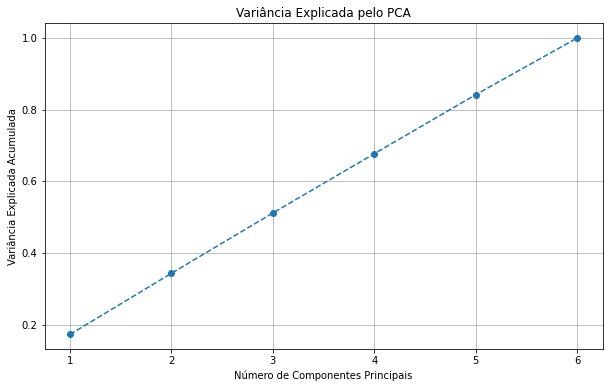

Accuracy: 0.7345
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74       997
           1       0.74      0.72      0.73      1003

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000

                           Date         Location       Country  Temperature  \
5202 2011-12-19 02:48:29.810981    New Donnafurt  South Africa    20.190744   
7942 2018-04-07 22:43:57.623762        Oneillton  South Africa    14.079005   
9190 2021-02-19 08:55:44.014401     East Mallory  South Africa    15.173620   
624  2001-06-08 05:05:53.195319      Stevenburgh  South Africa    12.778918   
4397 2010-02-10 20:23:06.858685         Devinton  South Africa    15.154172   
8839 2020-04-30 12:03:40.342034    Hernandezbury  South Africa     9.470464   
4342 2009-12-26 15:28:27.650765        Luisshire  South Africa    12.879226   


In [0]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pyspark.pandas as ps
 
# Carregando os dados
file_location = "/FileStore/tables/climate_change_data.csv"
df = ps.read_csv(file_location).to_pandas()
 
# Criando uma coluna de destino 'target' com base em uma condição (por exemplo, temperatura acima da média)
df['target'] = (df['Temperature'] > df['Temperature'].mean()).astype(int)
 
# Selecionando as variáveis numéricas para o PCA
features = ['Temperature', 'CO2 Emissions', 'Precipitation', 'Humidity', 'Wind Speed', 'Sea Level Rise']
df_features = df[features]
target = df['target']
 
# Padronizando os dados
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)
 
# Aplicando PCA
pca = PCA()
pca_components = pca.fit_transform(scaled_features)
 
# Percentual de variância explicada por cada componente
explained_variance = pca.explained_variance_ratio_
 
# Plotando a variância explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada pelo PCA')
plt.grid()
plt.show()
 
# Usando apenas os primeiros componentes principais que explicam a maioria da variância
n_components = 3  # Ajuste conforme necessário com base na variância explicada
pca = PCA(n_components=n_components)
pca_components = pca.fit_transform(scaled_features)
 
# Capturando os índices originais
indices = df.index
 
# Dividindo os dados em treino e teste, incluindo os índices
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    pca_components, target, indices, test_size=0.2, random_state=42)
 
# Criando e treinando o modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
 
# Fazendo previsões
y_pred = mlp.predict(X_test)
 
# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
 
# Criando um DataFrame com os dados de teste e as predições
df_test = df.loc[idx_test].copy()
df_test['Prediction'] = y_pred
df_test['Accuracy'] = accuracy  # Adicionando a acurácia como uma coluna
 
# Extraindo o subconjunto para a África do Sul
df_south_africa_predictions = df_test[df_test["Country"] == "South Africa"]
 
# Exibindo o resultado
print(df_south_africa_predictions)

In [0]:
df_south_africa_predictions

Date 
 Location 
 Country 
 Temperature 
 CO2 Emissions 
 Sea Level Rise 
 Precipitation 
 Humidity 
 Wind Speed 
 target 
 Prediction 
 Accuracy 
 
 
 
 
 5202 
 2011-12-19 02:48:29.810981 
 New Donnafurt 
 South Africa 
 20.190744 
 354.396848 
 0.222505 
 74.020297 
 7.062798 
 49.696142 
 1 
 1 
 0.7345 
 
 
 7942 
 2018-04-07 22:43:57.623762 
 Oneillton 
 South Africa 
 14.079005 
 390.788074 
 0.774298 
 27.580919 
 11.186988 
 22.104335 
 0 
 1 
 0.7345 
 
 
 9190 
 2021-02-19 08:55:44.014401 
 East Mallory 
 South Africa 
 15.173620 
 417.556846 
 -0.723507 
 59.859020 
 88.764547 
 39.722428 
 1 
 0 
 0.7345 
 
 
 624 
 2001-06-08 05:05:53.195319 
 Stevenburgh 
 South Africa 
 12.778918 
 360.570508 
 2.291537 
 78.568437 
 54.779141 
 39.568239 
 0 
 1 
 0.7345 
 
 
 4397 
 2010-02-10 20:23:06.858685 
 Devinton 
 South Africa 
 15.154172 
 444.937824 
 -1.049358 
 12.812707 
 25.700580 
 30.932173 
 1 
 0 
 0.7345 
 
 
 8839 
 2020-04-30 12:03:40.342034 
 Hernandezbury 
 South Africa 
 9.470464 
 324.475178 
 -1.319394 
 20.529996 
 34.917983 
 32.663057 
 0 
 0 
 0.7345 
 
 
 4342 
 2009-12-26 15:28:27.650765 
 Luisshire 
 South Africa 
 12.879226 
 415.528641 
 -0.039382 
 95.746367 
 82.516208 
 16.831612 
 0 
 0 
 0.7345 
 
 
 738 
 2001-09-11 23:34:04.644464 
 Sarafurt 
 South Africa 
 15.770152 
 398.566044 
 -1.177339 
 34.192164 
 11.869819 
 35.270217 
 1 
 1 
 0.7345 
 
 
 8028 
 2018-06-19 04:39:57.839783 
 South Sharonton 
 South Africa 
 25.555012 
 390.086223 
 1.951576 
 96.529079 
 16.534903 
 9.508678 
 1 
 1 
 0.7345

## 4. Conexão com Azure

In [0]:
!pip install pymongo

     |████████████████████████████████| 1.2 MB 8.9 MB/s 
     |████████████████████████████████| 313 kB 126.7 MB/s 
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-1533e78b-20c1-430a-9e4c-24f16bdd5173/bin/python -m pip install --upgrade pip' command.


In [0]:
import pymongo
from random import randint
import json

In [0]:
CONNECTION_STRING = """mongodb://conradcosmosdb:rkN9BM3Cxt5gjTar9hjUfMDeDFR1km4XkUciTnZzcbzWMiZwo1SGivGhUrJWQENPDqPAx8exIFYJACDbqpChIA==@conradcosmosdb.mongo.cosmos.azure.com:10255/?ssl=true&replicaSet=globaldb&retrywrites=false&maxIdleTimeMS=120000&appName=@conradcosmosdb@"""
DB_NAME = "api-mongodb-sample-database"
UNSHARDED_COLLECTION_NAME = "level_of_the_sea"
SAMPLE_FIELD_NAME = "sample_field"

def save_documents(collection, documents):
    """Save a list of documents to the collection"""
    for document in documents:
        collection.insert_one(document)
        print("Inserted document:", document)
    print("Saved {} documents to the collection".format(len(documents)))

def main():
    """Connect to the API for MongoDB, create DB and collection, perform CRUD operations"""
    client = pymongo.MongoClient(CONNECTION_STRING)
    try:
        client.server_info()  # validate connection string
    except pymongo.errors.ServerSelectionTimeoutError:
        raise TimeoutError("Invalid API for MongoDB connection string or timed out when attempting to connect")

    # Retrieve database and collection
    db = client[DB_NAME]
    collection = db[UNSHARDED_COLLECTION_NAME]

    # Convert DataFrame to JSON list of documents
    documents = json.loads(df_south_africa_predictions.to_json(orient="records"))

    # Save the documents to the collection
    save_documents(collection, documents)

if __name__ == '__main__':
    main()


<command-3702893422387475>:15: UserWarning: You appear to be connected to a CosmosDB cluster. For more information regarding feature compatibility and support please visit https://www.mongodb.com/supportability/cosmosdb
  client = pymongo.MongoClient(CONNECTION_STRING)


Inserted document: {'Date': 1324262909810, 'Location': 'New Donnafurt', 'Country': 'South Africa', 'Temperature': 20.190743637, 'CO2 Emissions': 354.3968480395, 'Sea Level Rise': 0.2225051395, 'Precipitation': 74.0202965159, 'Humidity': 7.0627984437, 'Wind Speed': 49.6961420354, 'target': 1, 'Prediction': 1, 'Accuracy': 0.7345, '_id': ObjectId('6737419cc2fea385be522a47')}
Inserted document: {'Date': 1523141037623, 'Location': 'Oneillton', 'Country': 'South Africa', 'Temperature': 14.0790047427, 'CO2 Emissions': 390.7880742136, 'Sea Level Rise': 0.7742977597, 'Precipitation': 27.5809185189, 'Humidity': 11.1869878438, 'Wind Speed': 22.1043351286, 'target': 0, 'Prediction': 1, 'Accuracy': 0.7345, '_id': ObjectId('6737419dc2fea385be522a48')}
Inserted document: {'Date': 1613724944014, 'Location': 'East Mallory', 'Country': 'South Africa', 'Temperature': 15.1736199921, 'CO2 Emissions': 417.5568457389, 'Sea Level Rise': -0.7235071594, 'Precipitation': 59.8590197022, 'Humidity': 88.76454655, '

## 5. Conclusão

A maioria dos locais mencionados, como Nova Christopherland, East Brittanyside, entre outros, parecem fictícios e incomuns. Embora os países listados sejam reais, a validade de suas respectivas localidades precisa ser verificada. Além disso, a presença de temperaturas negativas em países tropicais sugere possíveis erros de entrada de dados ou inconsistências, levando a resultados de modelagem irreais. Consequentemente, algumas dessas inconsistências provavelmente contribuíram para o desempenho insatisfatório do nosso modelo.


Ao treinar o Modelo MLP é notória a melhoria significativa, Isso significa que, em média, o seu modelo acertou a previsão 73,45% das vezes. Em outras palavras, para cada 100 exemplos, o modelo classificou corretamente 73.